In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hashlib
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [2]:
df = pd.read_csv('data/myNetaWebscraped.csv')
pd.options.mode.chained_assignment = None
candidates_data = df
winners_data = df[df['WINNER'] == 1]

In [3]:
party_candidates_counts = candidates_data['PARTY'].value_counts()
party_winners_counts = winners_data['PARTY'].value_counts()


unique_party_names = party_candidates_counts.index.unique()

party_color_map = {}

#Since there's too many parties, I cannot hard-code color, so I used a hash function that decides color based on party
# name which means same color will be assigned in both pie charts.
for party_name in unique_party_names:
    hash_value = int(hashlib.sha256(party_name.encode('utf-8')).hexdigest(), 16)
    color = '#' + format(hash_value % (2**24), '06x')  
    party_color_map[party_name] = color

# We can't directly pass the dictionary, so we convert it into the lists the px.pie() function needs here
colors_candidates = [party_color_map[party] for party in party_candidates_counts.index]
colors_winners = [party_color_map[party] for party in party_winners_counts.index]


fig_candidates = px.pie(values=party_candidates_counts.values,
                        names=party_candidates_counts.index,
                        title='Party Distribution for Candidates',
                        color_discrete_sequence=colors_candidates)


fig_winners = px.pie(values=party_winners_counts.values,
                      names=party_winners_counts.index,
                      title='Party Distribution for Winners',
                        color_discrete_sequence=colors_winners)


fig_candidates.update_traces(textposition='inside', textinfo='percent+label')
fig_winners.update_traces(textposition='inside', textinfo='percent+label')
fig_candidates.show()
fig_winners.show()

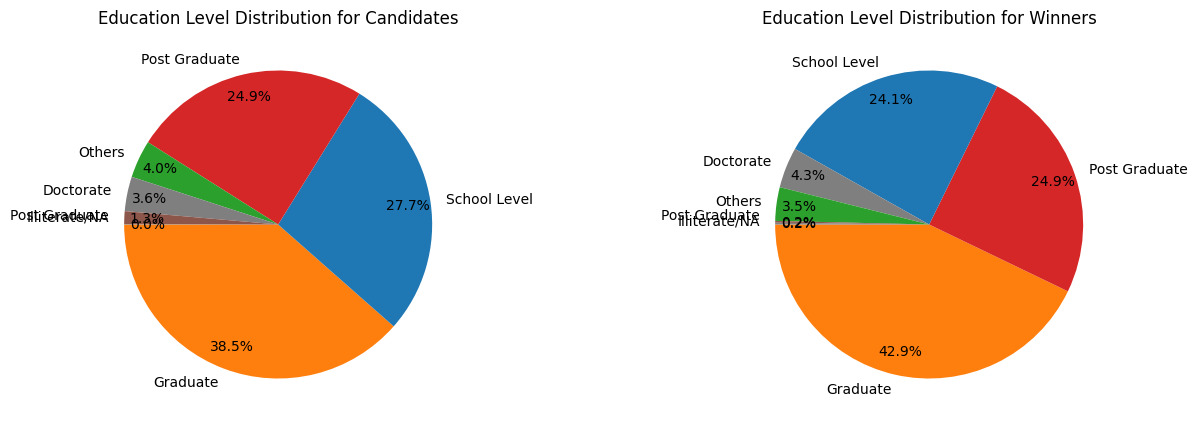

In [8]:

# Grouping to simplify data
candidates_data['EDUCATION'] = candidates_data['EDUCATION'].replace(['5th Pass', '8th Pass', '10th Pass', '12th Pass'], 'School Level')
winners_data['EDUCATION'] = winners_data['EDUCATION'].replace(['5th Pass', '8th Pass', '10th Pass', '12th Pass'], 'School Level')
candidates_data['EDUCATION'] = candidates_data['EDUCATION'].replace(['Illiterate', 'Not Available'], 'Illiterate/NA')
winners_data['EDUCATION'] = winners_data['EDUCATION'].replace(['Illiterate', 'Not Available'], 'Illiterate/NA')
candidates_data['EDUCATION'] = candidates_data['EDUCATION'].replace(['Literate'], 'Others')
winners_data['EDUCATION'] = winners_data['EDUCATION'].replace(['Literate'], 'Others')
candidates_data['EDUCATION'] = candidates_data['EDUCATION'].replace(['Graduate Professional'], 'Graduate')
winners_data['EDUCATION'] = winners_data['EDUCATION'].replace(['Graduate Professional'], 'Graduate')

education_candidates_counts = candidates_data['EDUCATION'].value_counts()
education_winners_counts = winners_data['EDUCATION'].value_counts()
unique_educations_candidates = candidates_data['EDUCATION'].unique()

#Since categories change places across the maps, we need a map to maintain the same color across charts
category_colors = {
    'School Level': 'tab:blue',
    'Graduate': 'tab:orange',
    'Post Graduate': 'tab:red',
    'Doctorate': 'tab:grey',
    'Others': 'tab:green',
    'Illiterate/NA': 'tab:brown'
}

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.pie(education_candidates_counts, labels=education_candidates_counts.index, autopct='%1.1f%%', startangle=180, pctdistance=0.85, colors=[category_colors.get(cat, 'gray') for cat in education_candidates_counts.index])
plt.title('Education Level Distribution for Candidates')

plt.subplot(1, 2, 2)
plt.pie(education_winners_counts, labels=education_winners_counts.index, autopct='%1.1f%%', startangle=180, pctdistance=0.85, colors=[category_colors.get(cat, 'gray') for cat in education_winners_counts.index])
plt.title('Education Level Distribution for Winners')
plt.subplots_adjust(wspace=0.5)  


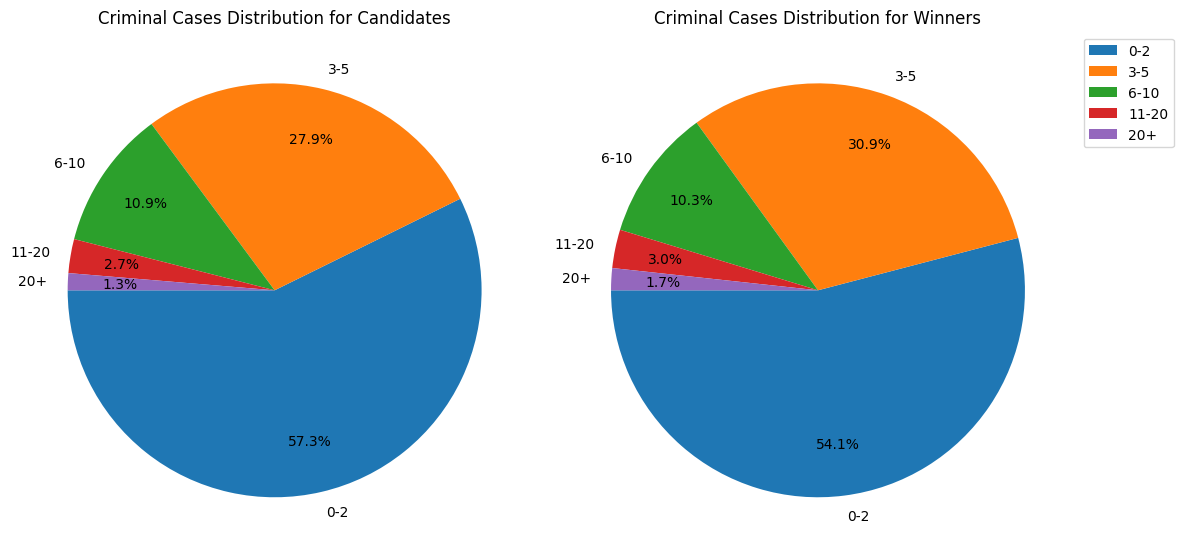

In [9]:
import matplotlib.pyplot as plt

candidates_data['Criminal_Range'] = pd.to_numeric(candidates_data['CRIMINAL_CASES'].replace("Not Available", pd.NA)).astype(float)
winners_data['Criminal_Range'] = pd.to_numeric(winners_data['CRIMINAL_CASES'].replace("Not Available", pd.NA)).astype(float)

# Group number of cases into ranges
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['0-2', '3-5', '6-10','11-20', '20+']
candidates_data['Criminal_Range'] = pd.cut(candidates_data['Criminal_Range'], bins=bins, labels=labels)
winners_data['Criminal_Range'] = pd.cut(winners_data['Criminal_Range'], bins=bins, labels=labels)

criminal_candidates_counts = candidates_data['Criminal_Range'].value_counts().sort_index()
criminal_winners_counts = winners_data['Criminal_Range'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(criminal_candidates_counts, labels=criminal_candidates_counts.index, autopct='%1.1f%%', startangle=180, pctdistance=0.75)
plt.title('Criminal Cases Distribution for Candidates')

plt.subplot(1, 2, 2)
plt.pie(criminal_winners_counts, labels=criminal_winners_counts.index, autopct='%1.1f%%', startangle=180, pctdistance=0.75)
plt.title('Criminal Cases Distribution for Winners')

plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))  
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender Distribution for Winners')

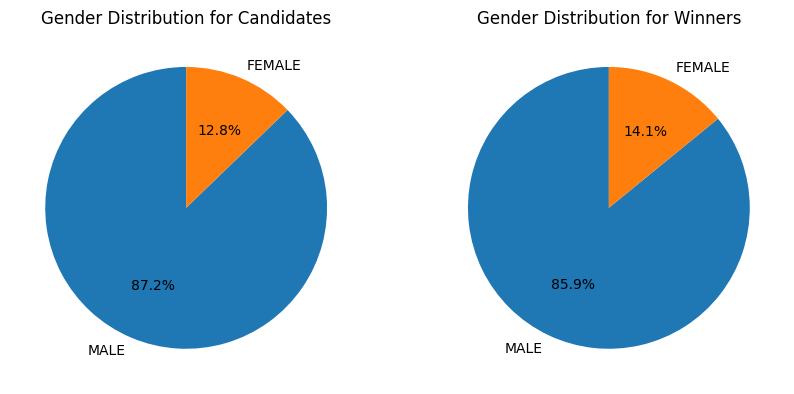

In [10]:
gender_candidates_counts = candidates_data['GENDER'].value_counts()
gender_winners_counts = winners_data['GENDER'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(gender_candidates_counts, labels=gender_candidates_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution for Candidates')

plt.subplot(1, 2, 2)
plt.pie(gender_winners_counts, labels=gender_winners_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution for Winners')

Text(0.5, 1.0, 'Category Distribution for Winners')

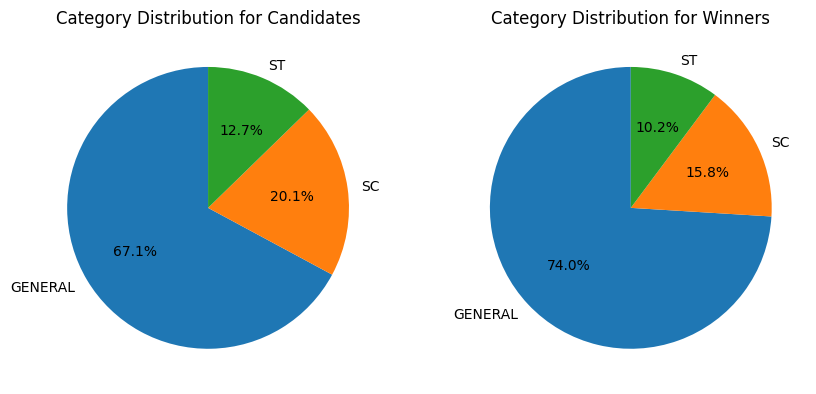

In [32]:
candidates_data = candidates_data.dropna(subset=['CATEGORY'])
winners_data = winners_data.dropna(subset=['CATEGORY'])
category_candidates_counts = candidates_data['CATEGORY'].value_counts()
category_winners_counts = winners_data['CATEGORY'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(category_candidates_counts, labels=category_candidates_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution for Candidates')

plt.subplot(1, 2, 2)
plt.pie(category_winners_counts, labels=category_winners_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution for Winners')